C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_24760/66473867.py:19: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_raw = pd.concat((df_raw, data.FP64GFLOPS), 1)


Shape & Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 2194 to 4849
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      1053 non-null   float64
 1   TDP (W)                1053 non-null   float64
 2   Die Size (mm^2)        1053 non-null   float64
 3   Transistors (million)  1053 non-null   float64
 4   Freq (MHz)             1053 non-null   float64
 5   FP64GFLOPS             1053 non-null   float64
dtypes: float64(6)
memory usage: 57.6 KB

Missing Values
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
FP64GFLOPS               0
dtype: int64

Heatmap


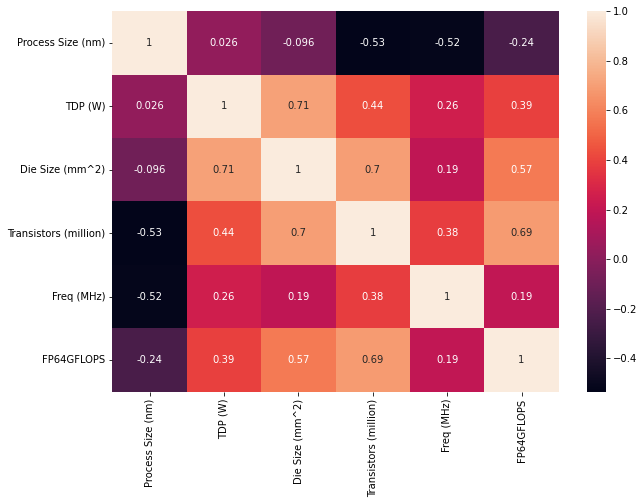

Confusion Matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]]
Accuracy :  0.09848484848484848


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

csv_path = r'C:\Users\Christian and Gemma\OneDrive\Graduate School\ANA680\Week 4\chip_dataset.csv'
data = pd.read_csv(csv_path)
 
# Scaling Variables Down to 0-10 Ranges:
# (I had to drop the spaces in the FP*GFLOPS variables for ease of coding)
df_norm = data.drop(['Index','Product','Type','Release Date','Foundry',
                     'Vendor','FP16GFLOPS','FP32GFLOPS','FP64GFLOPS'], axis=1)
df_raw = (df_norm-df_norm.min())/(df_norm.max()-df_norm.min()) * 10
df_raw = pd.concat((df_raw, data.FP64GFLOPS), 1)

# Initial review of the downloaded data frame, there are numerous "NaN" entries which
# should be removed:
df = df_raw.dropna()

# Examining the resulting data frame, verifying missing values removed, and reviewing
# heatmap - appears not much correlation, so accuracy may be lower than desired.
print('Shape & Info')
df.shape
df.info()
df.describe()

print()
print('Missing Values')
print(df.isnull().sum())
print()

# Heatmap:
print('Heatmap')
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

# input
x = df.iloc[:, [0,1,2,3,4]].values
# x[:, 1] = -x[:, 1]
  
# output
y = df.iloc[:, 5].values

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

svc = svm.SVC(kernel ='linear', C = 1).fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [31]:
data.head()

,Index,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16GFLOPS,FP32GFLOPS,FP64GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [32]:
df.head()

,Process Size (nm),TDP (W),Transistors (million),Freq (MHz),FP64GFLOPS
2194,0.56,0.266963,0.607470,2.976087,36.77
2204,0.28,2.769744,4.943903,3.478261,1010.00
2206,1.12,1.434928,0.651757,1.571739,85.25
2208,1.60,0.378198,0.214423,1.021739,27.36
2209,1.12,0.266963,0.215899,1.086957,9.60
